# Linear Regression 

Email: saideeptalari@gmail.com

Let's get started.

Hypothesis:     $h_\theta = \theta_0+\theta_1(x)$

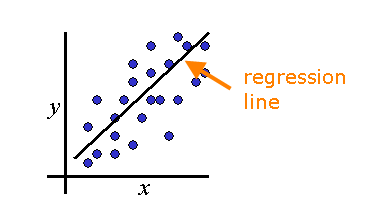

In [1]:
from IPython.display import Image
Image('regression_line.png')

## Ordinary Least Squares Method

For predicting future values we need to fit a line such that: $y=\theta_0+\theta_1(x)$

$\theta_0$- is the intercept ,
$\theta_1$- is the coefficient 

For computing $\theta_0$ and $\theta_1$ first we need to find variance and covariance.
$$ var(x) = \sum_{i=1}^n \frac{(x_i-\bar x)^2}{n-1}$$
$$ cov(x,y) = \sum_{i=1}^n \frac{(x_i-\bar x)(y_i-\bar y)}{n-1}$$

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
X = np.array([1,2,3,4,5,6])

In [4]:
Y = np.array([1.2,2.2,3.6,4.2,4.9,5.8])

In [5]:
#Variance
np.var(X,ddof=1)

3.5

In [6]:
#Covariance
np.cov(X,Y,ddof=1)[0][1]

3.1699999999999999

Then,
$$\theta_1 = \frac{cov(x,y)}{var(x)}$$

In [7]:
coef = np.cov(X,Y,ddof=1)[0][1]/np.var(X,ddof=1)
coef

0.90571428571428569

$$\theta_0 = \bar y - \theta_1 \bar x$$

In [8]:
intercept = np.mean(Y)-coef*np.mean(X)
intercept

0.48000000000000043

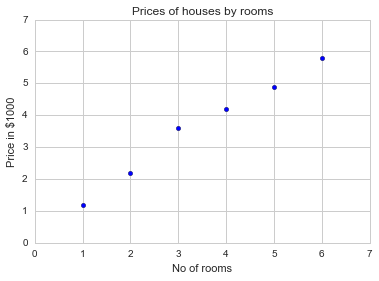

In [9]:
plt.scatter(X,Y)
plt.xlabel('No of rooms')
plt.ylabel('Price in $1000')
plt.title('Prices of houses by rooms')

In [10]:
x = np.vstack((X,np.ones(len(X)))).T

In [11]:
np.linalg.lstsq(x,Y)

(array([ 0.90571429,  0.48      ]),
 array([ 0.23942857]),
 2,
 array([ 9.79311843,  1.04634196]))

In [12]:
slope,intercept = np.linalg.lstsq(x,Y)[0]

In [13]:
print 'Slope: ',slope
print 'Intercept: ',intercept

Slope:  0.905714285714
Intercept:  0.48


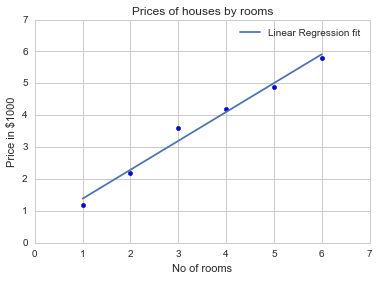

In [14]:
plt.scatter(X,Y)
plt.plot(X,slope*X+intercept,label='Linear Regression fit')
plt.xlabel('No of rooms')
plt.ylabel('Price in $1000')
plt.title('Prices of houses by rooms')
plt.legend()

## Linear Regression with scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
X = np.c_[X]
y = np.c_[Y]
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print "Intercept: ",model.intercept_
print "Coefficient:",model.coef_

Intercept:  0.48
Coefficient: [ 0.90571429]


### r-squared score

$$ SS_{total} = \sum_{i=1}^n (y_i-\bar y)^2$$
$$ SS_{residual} = \sum_{i=1}^n (y_i-f(x_i))^2$$

$$ R^2 = 1-\frac{SS_{total}}{SS_{residual}} $$

$$ 0 \leq R^2 \leq 1$$

In [18]:
model.score(X,Y)    #r-squared score

0.98359516468457886

Let's consider an example of random regression dataset.

In [19]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split

In [20]:
X,Y = make_regression(n_features=1,n_samples=250,noise=0.7,effective_rank=4,random_state=5)

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

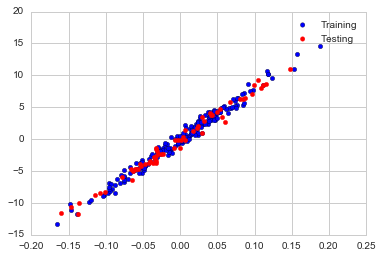

In [22]:
plt.scatter(X_train,Y_train,label='Training')
plt.scatter(X_test,Y_test,color='red',label='Testing')
plt.legend()

In [23]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.98373290662539092

In [24]:
predicted = model.predict(X_test)

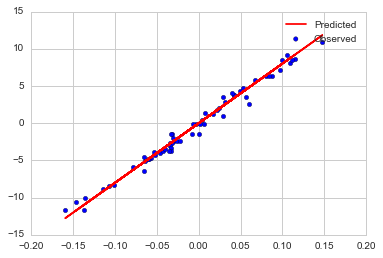

In [25]:
plt.scatter(X_test,Y_test,label='Observed')
plt.plot(X_test,predicted,color='red',label='Predicted')
plt.legend()

In [26]:
#Sum of Squared Errors
np.sum((Y_test-predicted)**2)

30.60105981820249

In [27]:
#Mean of Squared Errors
np.mean((Y_test-predicted)**2)

0.48573110822543636

In [28]:
#Variance
np.var((Y_test-predicted)**2)

0.52310515854814366

In [29]:
#Standard Deviation
np.std((Y_test-predicted)**2)

0.72326009052632212

In [30]:
#Residual
np.sum((Y_test-Y_test.mean())**2)

1881.1633469791773

In [31]:
# R-squared score
1-(np.sum((Y_test-predicted)**2)/np.sum((Y_test-Y_test.mean())**2))

0.98373290662539092

## Gradient Descent

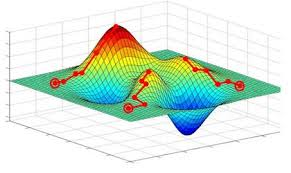

In [32]:
Image('gradient_descent_2.jpg',height=640,width=480)

The line h(x) we fit should be minimized as much as possible

Cost Function/Squared Error Function:
$$J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i=0}^m [h_\theta (x^{(i)})-y^{(i)}]^2$$
'm' can be any positive integer, it is just used for normalization
 
Our goal is to minimize the cost function.

$$ Goal \to minimize_{\theta_0,\theta_1} [J(\theta_0,\theta_1)]$$

repeat untill convergence 
$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta_0,\theta_1)$$
$\alpha$ - learning rate


Note:

1) If $\alpha$ is too small, then the gradient descent can be very slow.


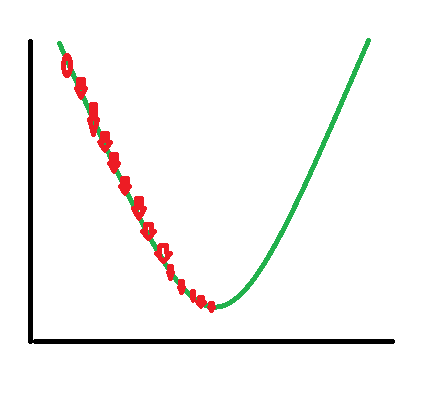

In [33]:
Image('gradient_descent_fixed.png')

2) If $\alpha$ is too large, gradient descent can overshoot the minimum. It may fail to converge, or even diverge.

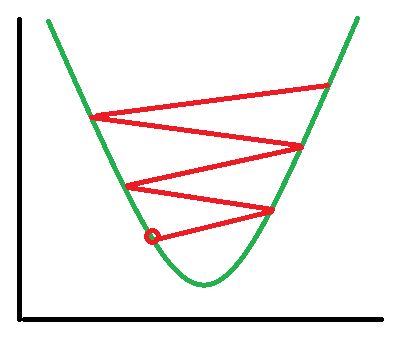

In [34]:
Image('gradient_descent_diverge.png')

3) Gradient Descent can converge to a local minimum even with the learning rate $\alpha$ fixed.

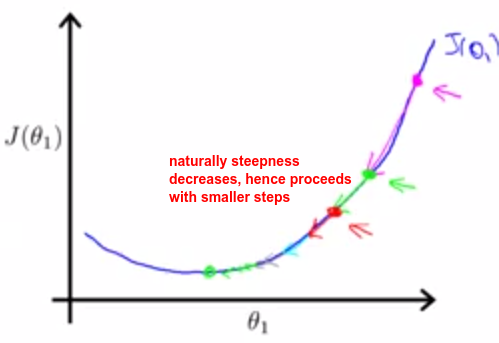

In [35]:
Image('gradient_descent_alpha_fixed.png')

So, solving partial differentiation we can now formulate them as: 

repeat until convergence {

$$\theta_0 = \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})$$
$$\theta_1 = \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}$$

}

So now we can program gradient descent as follows:

In [36]:
class GradientDescent(object):
    
    def __init__(self,alpha=0.1,n_iter=None,t0=1,t1=1):
        self.alpha = alpha
        self.n_iter = n_iter
        self.t0 = t0
        self.t1 = t1
        self.sse = None
        self.j =[]
        
    def fit(self,data,target):
        self.X = data
        self.Y = target
    
    def get_gradient(self,t1=False):
        
        cost = self.t0+self.t1*self.X - self.Y
        if t1:
            cost = self.X*cost
        inv_size = 1.0/len(X)
        sum_cost = np.sum(cost)
        return inv_size*sum_cost
    
    def sum_of_squared_error(self,t0,t1):
        sse = (self.Y-(t0+t1*X))**2
        self.sse = np.mean(sse)
        return self.sse
        
    def run(self):
        counter = 0
        
        while counter!=self.n_iter:
            t0 = self.t0 - (self.alpha*self.get_gradient())
            t1 = self.t1 - (self.alpha*self.get_gradient(t1=True))
            self.t0 = t0
            self.t1 = t1
            counter += 1
            self.get_j()
            
        return (t0,t1)
    
    def get_j(self):
        cost = (self.t0+self.t1*self.X - self.Y)**2
        inv_size = 0.5/len(X)
        sum_cost = np.sum(cost)
        self.j.append(inv_size*sum_cost)

Let's take in the example dataset from data.csv file having one feature and one target

In [37]:
data = pd.read_csv('data.csv',header=None)
X = data[[0]].values.reshape(len(data),1)
Y = data[[1]].values.reshape(len(data),1)

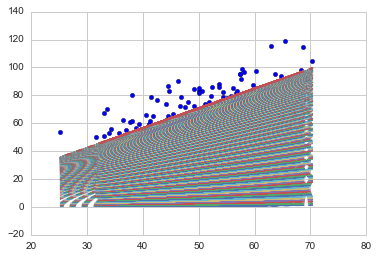

In [38]:
plt.scatter(X,Y)

for i in range(1,250):
    gd = GradientDescent(n_iter=i,alpha=0.000005,t0=0,t1=0)
    gd.fit(X,Y)
    t0,t1 = gd.run()
    plt.plot(X,t1*X+t0,'--')

In [39]:
print "Intercept: ",t0
print "Coefficient: ",t1

Intercept:  0.0281607502213
Coefficient:  1.41373468432


Doing the same with Ordinary Least Squares:

In [40]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predicted = model.predict(X)

In [42]:
print "Intercept: ",model.intercept_
print "Coefficient: ",model.coef_

Intercept:  [ 7.99102098]
Coefficient:  [[ 1.32243102]]


Fitting in the both methods:

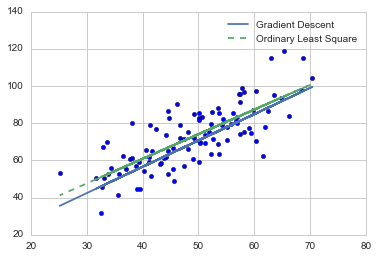

In [43]:
plt.scatter(X,Y)
plt.plot(X,t0+t1*X,label='Gradient Descent')
plt.plot(X,model.intercept_+model.coef_*X,'--',label='Ordinary Least Square')
plt.legend()

Now let's look into the learning coefficient

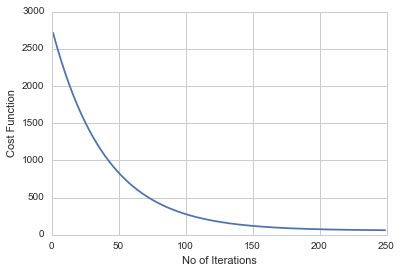

In [45]:
j = gd.j
c = np.arange(1,gd.n_iter+1)
plt.plot(c,j)
plt.xlabel('No of Iterations')
plt.ylabel('Cost Function')

Here in this case we need to increase learning rate further.

If we increase learning rate then:

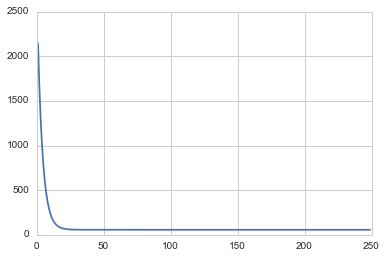

In [46]:
gd = GradientDescent(n_iter=i,alpha=0.00005,t0=0,t1=0)
gd.fit(X,Y)
t0,t1 = gd.run()
j = gd.j
c = np.arange(1,gd.n_iter+1)
plt.plot(c,j)

So this is good, and from above plot we can conclude that after about 100 iterations we can minimize the cost function.

Further increasing learning rate, divergence occurs:

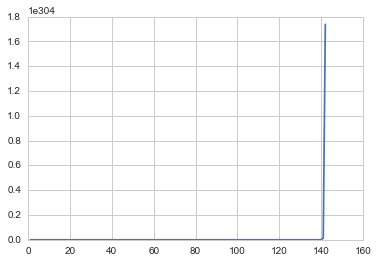

In [47]:
gd = GradientDescent(n_iter=i,alpha=0.005,t0=0,t1=0)
gd.fit(X,Y)
t0,t1 = gd.run()
j = gd.j
c = np.arange(1,gd.n_iter+1)
plt.plot(c,j)

Here we need to decrease the learning rate $\alpha$.
From above plot it is clear that after 140 iterations it diverges